In [1]:
import pandas as pd
import numpy as np
import collections

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
import nltk
nltk.download('popular')

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import hdbscan
import hashlib


import pymorphy2
morph = pymorphy2.MorphAnalyzer()

#Libraries for clustering
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift

#Load data set
df = pd.read_csv('Products.csv', encoding= 'ANSI')
text1 = df.PRODUCTTYPE.unique()

stop_words = stopwords.words("russian")
stop_w = ["для", "на", "и", "средств", "набор", "после", "до", "по", "за"]
stop_w_2 = ["для", "на", "и", "средств", "набор", "после", "до", "по", "за", "крем", "гель", "масло"]
stop_w_3 = stop_words + ['парфюмерный', 'парфюмировать', 'парфюмированный', 'набор', "бальзам","средство"
                        , "крем", "гель", 'аппарат', 'аппликатор', 'мусс', 'базовое', 'масло', 'молочко', 'лосьон'
                        ,'пена','пудра', 'эссенция', 'эмульсия', 'краска', 'блеск', "лак", "грим", "карандаш", "воск"
                        , 'вода', 'инструмент', 'паста', 'полоски', 'прибор', 'для', 'после', 'до']

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Kirill\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_dat

In [2]:
df.head()

,PRODUCTTYPE
0,Крем/Гель для душа
1,ПАРФЮМЕРНАЯ ВОДА Женская
2,ПАРФЮМЕРНАЯ ВОДА Женская
3,Парфюмированный скраб для тела
4,Парфюмированный крем для тела


In [3]:
test_text = ['i like it', ' very much']
vectorizer_hash = HashingVectorizer(analyzer='word', n_features=10)
vectorizer_hash.fit_transform(test_text).toarray().tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.7071067811865475,
  0.0,
  0.0,
  0.7071067811865475,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.7071067811865475,
  0.0,
  0.0,
  -0.7071067811865475]]

In [4]:
def steming_for_cloud(sentence):
    spec_chars = string.punctuation + '\n\xa0«»\t—…' 
    token_words = word_tokenize(sentence.lower())
    stem_sentence = [word for word in token_words]
    return ' '.join([word for word in stem_sentence if (word not in spec_chars)])

def steming_for_cloud_woth_no_preposition(sentence):
    spec_chars = string.punctuation + '\n\xa0«»\t—…' 
    token_words = word_tokenize(sentence.lower())
    stem_sentence = [word for word in token_words]
    return ' '.join([word for word in stem_sentence if (word not in spec_chars) and (word not in stop_words)])


def steming_for_cloud_woth_no_preposition_2(sentence):
    spec_chars = string.punctuation + '\n\xa0«»\t—…' 
    token_words = word_tokenize(sentence.lower())
    stem_sentence = [morph.parse(word)[0].normal_form for word in token_words]
    return ' '.join([word for word in stem_sentence if (word not in spec_chars) and (word not in stop_words)])

def steming_for_cloud_woth_no_preposition_3(sentence):
    spec_chars = string.punctuation + '\n\xa0«»\t—…' 
    token_words = word_tokenize(sentence.lower())
    stem_sentence = [morph.parse(word)[0].normal_form for word in token_words]
    return ' '.join([word for word in stem_sentence if (word not in spec_chars) and (word not in stop_w_3)])

(-0.5, 399.5, 199.5, -0.5)

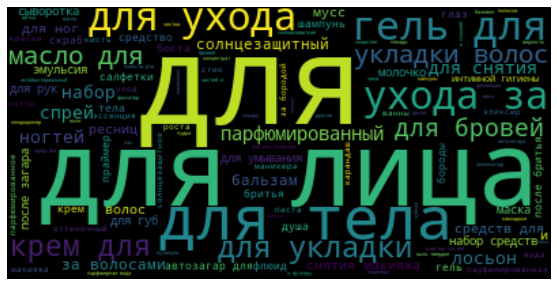

In [5]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
text_raw =  [steming_for_cloud(x.replace('/', ' ').replace('-', ' ')) for x in text1]
wordcloud = WordCloud().generate(" ".join(text_raw))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

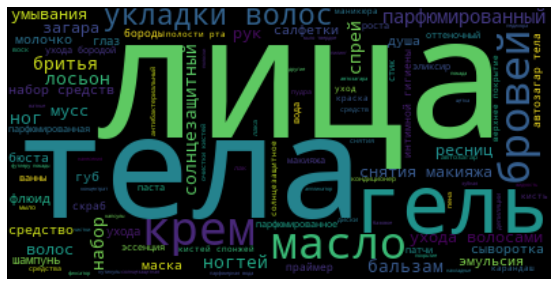

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
text_raw =  [steming_for_cloud_woth_no_preposition(x.replace('/', ' ').replace('-', ' ')) for x in text1]
wordcloud = WordCloud().generate(" ".join(text_raw))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

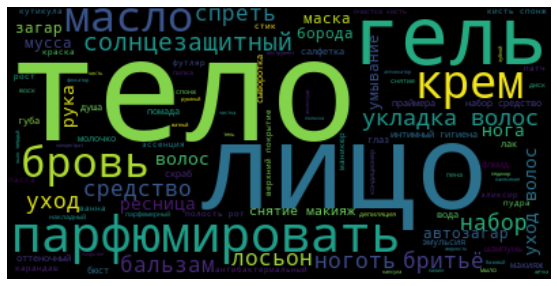

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
text_raw =  [steming_for_cloud_woth_no_preposition_2(x.replace('/', ' ').replace('-', ' ')) for x in text1]
wordcloud = WordCloud().generate(" ".join(text_raw))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

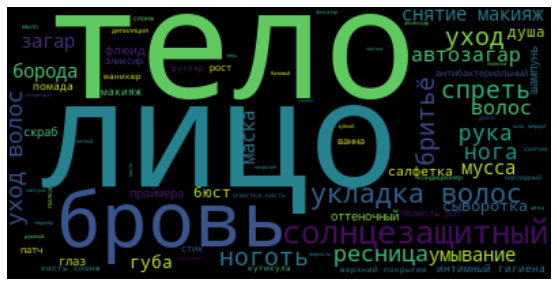

In [8]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 5))
text_raw =  [steming_for_cloud_woth_no_preposition_3(x.replace('/', ' ').replace('-', ' ')) for x in text1]
wordcloud = WordCloud().generate(" ".join(text_raw))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [9]:
# def steming(sentence):
#     spec_chars = string.punctuation + '\n\xa0«»\t—…' 
#     token_words = word_tokenize(sentence.lower())
#     #stem_sentence = [morph.parse(word)[0].normal_form for word in token_words if (word not in spec_chars) and (word not in stop_w_3)]
#     stem_sentence = [morph.parse(word)[0].normal_form for word in token_words if (word not in spec_chars) and (word not in stop_words)]
#     #return ' '.join([word for word in stem_sentence if (word not in spec_chars)])
#     return ' '.join([word for word in stem_sentence])


def steming(sentence):
    spec_chars = string.punctuation + '\n\xa0«»\t—…' 
    token_words = word_tokenize(sentence.lower())
    stem_sentence = [morph.parse(word)[0].normal_form for word in token_words]
    return ' '.join([word for word in stem_sentence if (word not in spec_chars) and (word not in stop_w_3)])



text3 = pd.Series([steming(x.replace('/', ' ').replace('-', ' ')) for x in text1])

In [10]:
text3

0                  душа
1               женский
2            скраб тело
3                  тело
4            дезодорант
             ...       
528               ванна
529    интимный гигиена
530      маска защитный
531               волос
532    губка душа ванна
Length: 533, dtype: object

In [11]:
# vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2), stop_words = stop_w)
# X_ntf = vectorizer_ntf.fit_transform(text3)
vectorizer_hash = HashingVectorizer(analyzer='word',ngram_range=(1,2), stop_words = stop_words)
X_ntf = vectorizer_hash.fit_transform(text3)

In [12]:
X_ntf.shape

(533, 1048576)

In [13]:
int(X_ntf.shape[1]/2)

524288

In [14]:
np.random.seed(42)
x1 = np.random.normal(-1, 3, size=int(X_ntf.shape[1]/2))
np.random.seed(24)
x2 = np.random.normal(-1, 10,size=int(X_ntf.shape[1]/2))
X = []
Y = []
for r in X_ntf.toarray():
    X.append(r[0:int(X_ntf.shape[1]/2)] @ x1)
    Y.append(r[int(X_ntf.shape[1]/2) : ] @ x2)
    

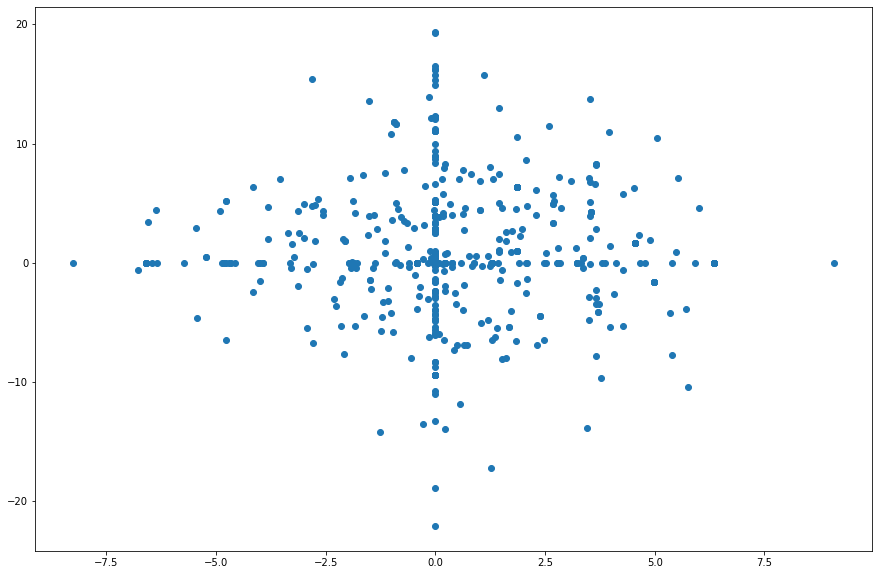

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(X, Y)

In [16]:
# sse={}
# for k in np.arange(100,900,100):
#     kmeans = KMeans(n_clusters=k, verbose = True).fit(X_ntf)
#     sse[k] = kmeans.inertia_
# plt.plot(list(sse.keys()),list(sse.values()))
# plt.xlabel('Values for K')
# plt.ylabel('SSE')
# plt.show();

In [17]:
# plt.plot(list(sse.keys()),list(sse.values()))
# plt.xlabel('Values for K')
# plt.ylabel('SSE')
# plt.show();

In [18]:
#model = KMeans(n_clusters= 50, verbose = True)
model = AffinityPropagation(damping = 0.5, max_iter=1000, convergence_iter=100)
#model = MeanShift(n_jobs = 6)
#hdb = hdbscan
#model = hdb.HDBSCAN()
Y_pred = model.fit_predict(X_ntf)


In [25]:
labels = model.cluster_
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

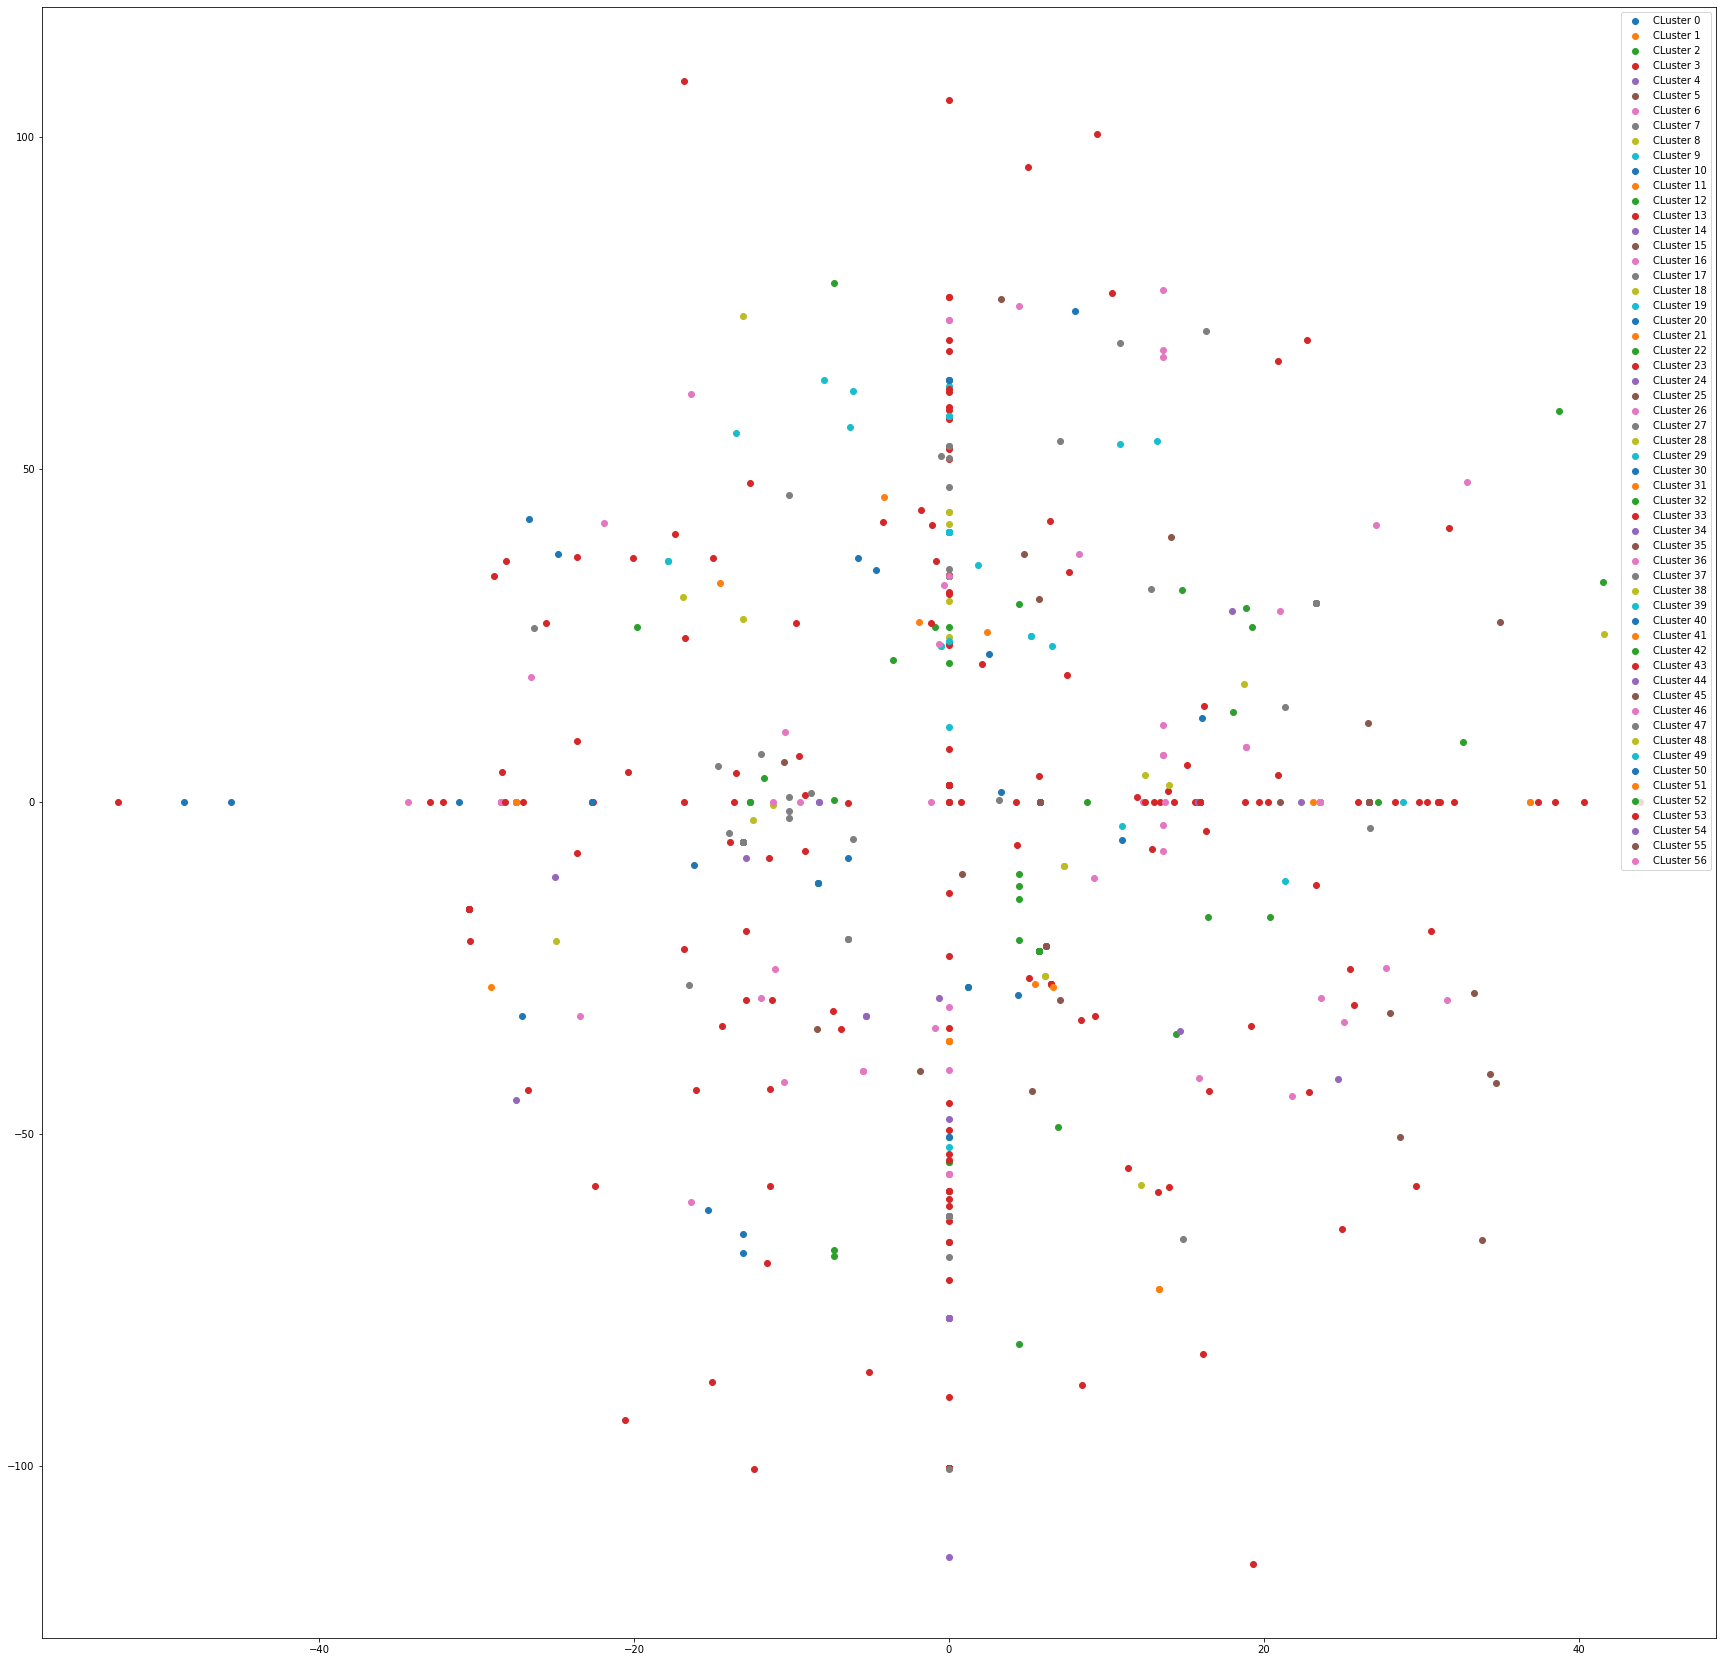

In [35]:
fig, ax = plt.subplots(figsize = (30, 30))

np.random.seed(42)
x1 = np.random.noncentral_chisquare(3, 20, size=int(X_ntf.shape[1]/2))
np.random.seed(24)
x2 = np.random.noncentral_chisquare(50, 10,size=int(X_ntf.shape[1]/2))

labels = set(Y_pred)
for l in labels:
    X = []
    Y = []
    for  r in X_ntf[Y_pred == l].toarray():
        X.append(r[0:int(X_ntf.shape[1]/2)] @ x1)
        Y.append(r[int(X_ntf.shape[1]/2) : ] @ x2)
    plt.scatter(X, Y, label = f'CLuster {l}')
plt.legend()

       

In [25]:
text1 = df.PRODUCTTYPE
text3 = pd.Series([steming(x.replace('/', ' ')) for x in text1])
X_ntf = vectorizer_hash.transform(text3)
df['cluster'] = model.predict(X_ntf.toarray())

In [ ]:
df

,PRODUCTTYPE,cluster
0,Крем/Гель для душа,41
1,ПАРФЮМЕРНАЯ ВОДА Женская,13
2,ПАРФЮМЕРНАЯ ВОДА Женская,13
3,Парфюмированный скраб для тела,3
4,Парфюмированный крем для тела,3
...,...,...
3758,Уход для лица,36
3759,Тон кожи,13
3760,Макияж для глаз,46
3761,Помада для губ,25


In [ ]:
df[['cluster', 'PRODUCTTYPE']].sort_values('cluster').to_excel('NewClusteringProducts.xlsx', index = False) 
#df[['cluster', 'PRODUCTTYPE']].sort_values('cluster').to_excel('MeanShiftClusteringProducts.xlsx', index = False) 

In [ ]:
model.cluster_centers_.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])